In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('state_TX.csv')

<ipython-input-3-fe0c8c571ebe>:1: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44,46,77,78,79,80) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('state_TX.csv')


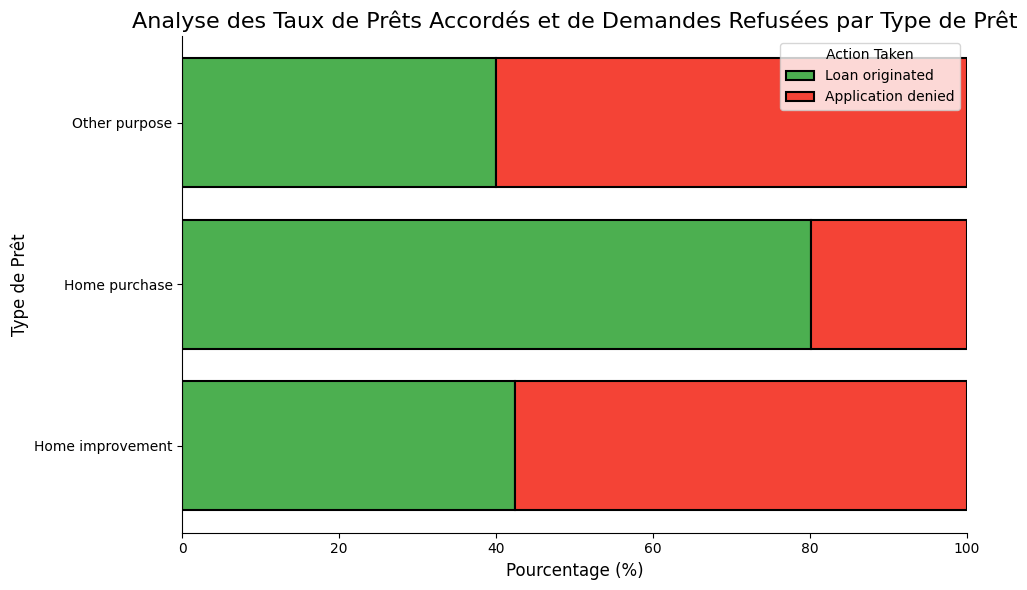

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
state_TX = pd.read_csv('state_TX.csv', low_memory=False)

# Remapper les valeurs de 'action_taken'
action_mapping = {1: 'Loan originated', 3: 'Application denied'}
state_TX['action_taken_desc'] = state_TX['action_taken'].map(action_mapping)

# Remapper les valeurs de 'loan_purpose'
loan_purpose_mapping = {
    1: 'Home purchase', 2: 'Home improvement',
    3: 'Refinancing', 4: 'Other purpose'
}
state_TX['loan_purpose_desc'] = state_TX['loan_purpose'].map(loan_purpose_mapping)

# Filtrer les données pour les actions pertinentes
filtered_data = state_TX[state_TX['action_taken_desc'].isin(['Loan originated', 'Application denied'])]

# Calculer le pourcentage par loan_purpose
loan_purpose_percentage = filtered_data.groupby(['loan_purpose_desc', 'action_taken_desc']).size().unstack(fill_value=0)
loan_purpose_percentage = loan_purpose_percentage.apply(lambda x: (x / x.sum()) * 100, axis=1)

# Créer la figure et les axes
fig, ax = plt.subplots(figsize=(10, 6))

# Graphique pour loan_purpose
loan_purpose_bars = ax.barh(
    loan_purpose_percentage.index,
    loan_purpose_percentage['Loan originated'],
    color='#4CAF50',
    edgecolor='black',
    linewidth=1.5,
    label='Loan originated'
)

# Ajouter les barres pour les demandes refusées
ax.barh(
    loan_purpose_percentage.index,
    loan_purpose_percentage['Application denied'],
    left=loan_purpose_percentage['Loan originated'],
    color='#F44336',
    edgecolor='black',
    linewidth=1.5,
    label='Application denied'
)

# Configurer le graphique
ax.set_title('Analyse des Taux de Prêts Accordés et de Demandes Refusées par Type de Prêt', fontsize=16)
ax.set_xlabel('Pourcentage (%)', fontsize=12)
ax.set_ylabel('Type de Prêt', fontsize=12)
ax.legend(title='Action Taken')
plt.xlim(0, 100)  # Limiter l'axe des x à 100%

# Afficher le graphique
sns.despine()
plt.tight_layout()
plt.show()


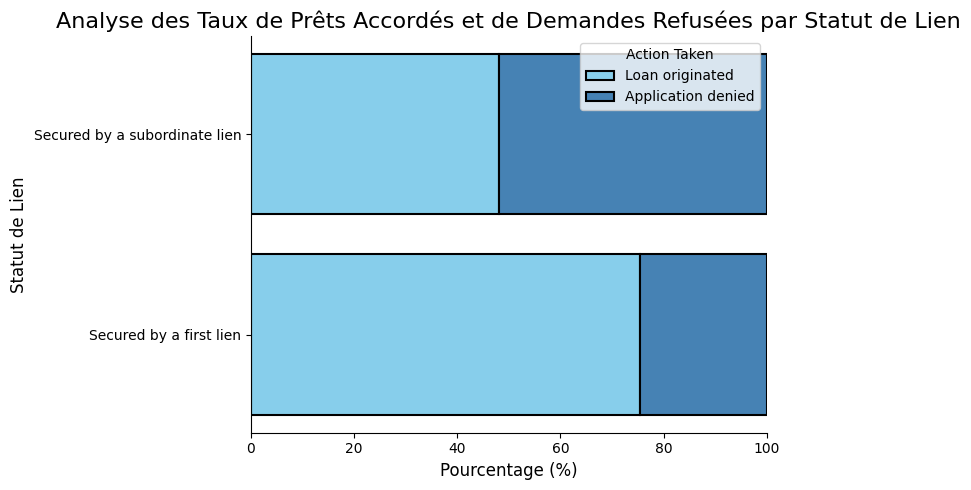

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
state_TX = pd.read_csv('state_TX.csv', low_memory=False)

# Remapper les valeurs de 'action_taken'
action_mapping = {1: 'Loan originated', 3: 'Application denied'}
state_TX['action_taken_desc'] = state_TX['action_taken'].map(action_mapping)

# Remapper les valeurs de 'lien_status'
lien_status_mapping = {1: 'Secured by a first lien', 2: 'Secured by a subordinate lien'}
state_TX['lien_status_desc'] = state_TX['lien_status'].map(lien_status_mapping)

# Filtrer les données pour les actions pertinentes
filtered_data = state_TX[state_TX['action_taken_desc'].isin(['Loan originated', 'Application denied'])]

# Calculer le pourcentage par lien_status
lien_status_percentage = filtered_data.groupby(['lien_status_desc', 'action_taken_desc']).size().unstack(fill_value=0)
lien_status_percentage = lien_status_percentage.apply(lambda x: (x / x.sum()) * 100, axis=1)

# Créer la figure et les axes
fig, ax = plt.subplots(figsize=(8, 5))

# Graphique pour lien_status
lien_status_bars = ax.barh(
    lien_status_percentage.index,
    lien_status_percentage['Loan originated'],
    color='#87CEEB',
    edgecolor='black',
    linewidth=1.5,
    label='Loan originated'
)

# Ajouter les barres pour les demandes refusées
ax.barh(
    lien_status_percentage.index,
    lien_status_percentage['Application denied'],
    left=lien_status_percentage['Loan originated'],
    color='#4682B4',
    edgecolor='black',
    linewidth=1.5,
    label='Application denied'
)

# Configurer le graphique
ax.set_title('Analyse des Taux de Prêts Accordés et de Demandes Refusées par Statut de Lien', fontsize=16)
ax.set_xlabel('Pourcentage (%)', fontsize=12)
ax.set_ylabel('Statut de Lien', fontsize=12)
ax.legend(title='Action Taken')
plt.xlim(0, 100)  # Limiter l'axe des x à 100%

# Afficher le graphique
sns.despine()
plt.tight_layout()
plt.show()


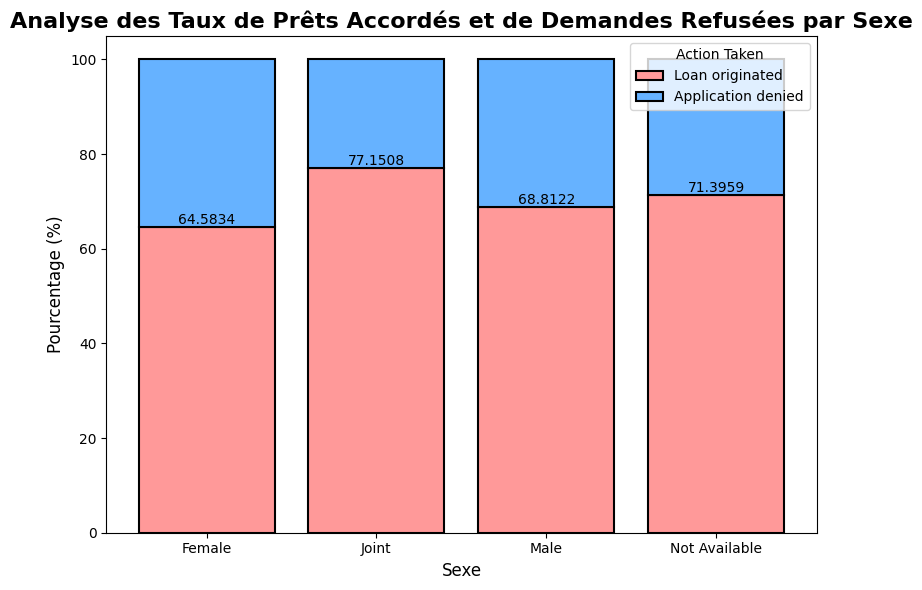

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
state_TX = pd.read_csv('state_TX.csv', low_memory=False)

# Remapper les valeurs de 'action_taken'
action_mapping = {
    1: 'Loan originated',
    2: 'Application approved but not accepted',
    3: 'Application denied',
    4: 'Application withdrawn by applicant',
    5: 'File closed for incompleteness',
    6: 'Purchased loan',
    7: 'Preapproval request denied',
    8: 'Preapproval request approved but not accepted'
}
state_TX['action_taken_desc'] = state_TX['action_taken'].map(action_mapping)

# Remapper les valeurs de 'derived_sex'
sex_mapping = {
    'Male': 'Male',
    'Female': 'Female',
    'Joint': 'Joint',
    'Sex Not Available': 'Not Available'
}
state_TX['derived_sex_desc'] = state_TX['derived_sex'].map(sex_mapping)

# Filtrer uniquement les prêts accordés (Loan originated) et les demandes refusées (Application denied)
filtered_data = state_TX[state_TX['action_taken_desc'].isin(['Loan originated', 'Application denied'])]

# Graphique pour derived_sex
sex_percentage = filtered_data.groupby(['derived_sex_desc', 'action_taken_desc']).size().unstack(fill_value=0)
sex_percentage = sex_percentage.apply(lambda x: (x / x.sum()) * 100, axis=1)

# Création du graphique
plt.figure(figsize=(8, 6))
bars = plt.bar(sex_percentage.index, sex_percentage['Loan originated'], color='#FF9999', edgecolor='black', linewidth=1.5, label='Loan originated')
plt.bar(sex_percentage.index, sex_percentage['Application denied'], bottom=sex_percentage['Loan originated'], color='#66B2FF', edgecolor='black', linewidth=1.5, label='Application denied')

plt.title('Analyse des Taux de Prêts Accordés et de Demandes Refusées par Sexe', fontsize=16, fontweight='bold')
plt.xlabel('Sexe', fontsize=12)
plt.ylabel('Pourcentage (%)', fontsize=12)
plt.legend(title='Action Taken', loc='upper right')
plt.bar_label(bars)  # Afficher les valeurs sur les barres
plt.tight_layout()

# Afficher le graphique
plt.show()

<ipython-input-35-e2aaf755828e>:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(race_percentage['Loan originated'][index] + value + 1, index, f'{value:.1f}%', va='center')  # Ajout de texte sur les barres de 'Application denied'


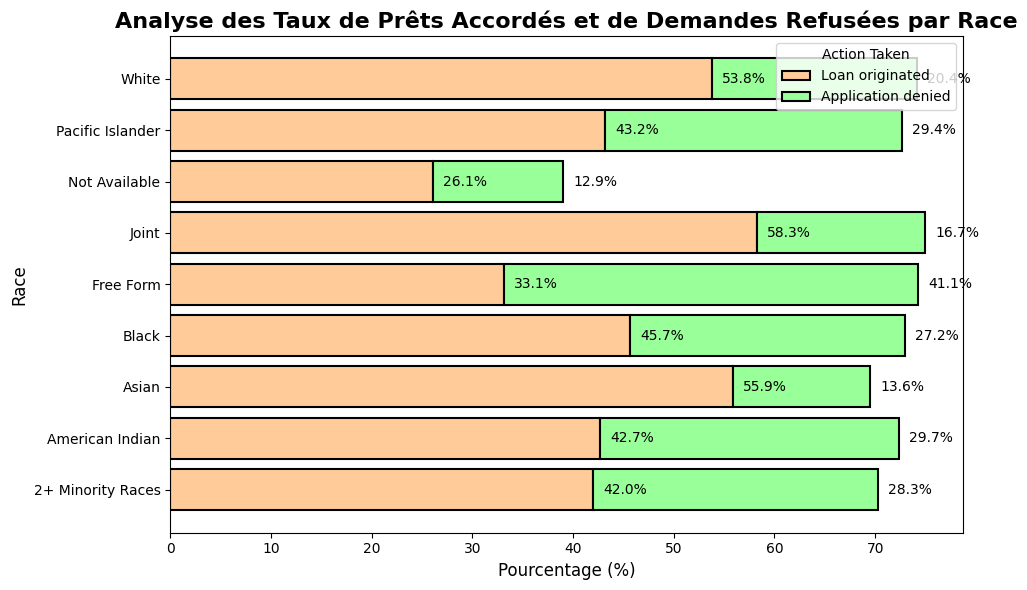

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
state_TX = pd.read_csv('state_TX.csv', low_memory=False)

# Remapper les valeurs de 'action_taken'
action_mapping = {
    1: 'Loan originated',
    2: 'Application approved but not accepted',
    3: 'Application denied',
    4: 'Application withdrawn by applicant',
    5: 'File closed for incompleteness',
    6: 'Purchased loan',
    7: 'Preapproval request denied',
    8: 'Preapproval request approved but not accepted'
}
state_TX['action_taken_desc'] = state_TX['action_taken'].map(action_mapping)

# Remapper les valeurs de 'derived_race'
race_mapping = {
    'American Indian or Alaska Native': 'American Indian',
    'Asian': 'Asian',
    'Black or African American': 'Black',
    'Native Hawaiian or Other Pacific Islander': 'Pacific Islander',
    'White': 'White',
    '2 or more minority races': '2+ Minority Races',
    'Joint': 'Joint',
    'Free Form Text Only': 'Free Form',
    'Race Not Available': 'Not Available'
}
state_TX['derived_race_desc'] = state_TX['derived_race'].map(race_mapping)

# Graphique pour derived_race
race_percentage = state_TX.groupby(['derived_race_desc', 'action_taken_desc']).size().unstack(fill_value=0)
race_percentage = race_percentage.apply(lambda x: (x / x.sum()) * 100, axis=1)

# Création du graphique à barres horizontales
plt.figure(figsize=(10, 6))

# Barres pour 'Loan originated'
plt.barh(race_percentage.index, race_percentage['Loan originated'], color='#FFCC99', edgecolor='black', linewidth=1.5, label='Loan originated')

# Barres pour 'Application denied' en ajoutant les valeurs au-dessus des barres de 'Loan originated'
plt.barh(race_percentage.index, race_percentage['Application denied'], left=race_percentage['Loan originated'], color='#99FF99', edgecolor='black', linewidth=1.5, label='Application denied')

# Ajouter des labels
for index, value in enumerate(race_percentage['Loan originated']):
    plt.text(value + 1, index, f'{value:.1f}%', va='center')  # Ajout de texte sur les barres de 'Loan originated'

for index, value in enumerate(race_percentage['Application denied']):
    plt.text(race_percentage['Loan originated'][index] + value + 1, index, f'{value:.1f}%', va='center')  # Ajout de texte sur les barres de 'Application denied'

# Configuration du graphique
plt.title('Analyse des Taux de Prêts Accordés et de Demandes Refusées par Race', fontsize=16, fontweight='bold')
plt.xlabel('Pourcentage (%)', fontsize=12)
plt.ylabel('Race', fontsize=12)
plt.legend(title='Action Taken', loc='upper right')
plt.tight_layout()

# Afficher le graphique
plt.show()



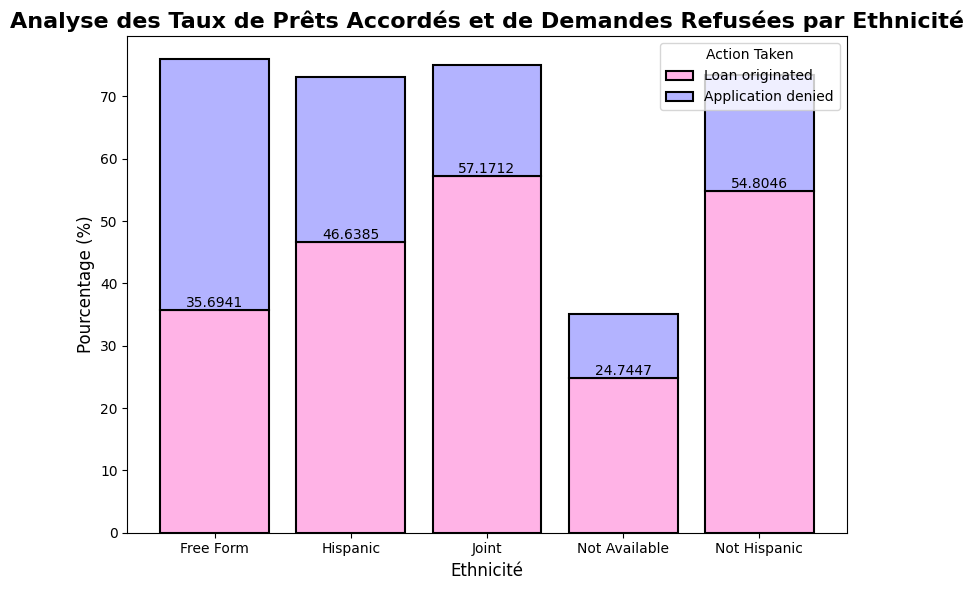

In [34]:
# Remapper les valeurs de 'derived_ethnicity'
ethnicity_mapping = {
    'Hispanic or Latino': 'Hispanic',
    'Not Hispanic or Latino': 'Not Hispanic',
    'Joint': 'Joint',
    'Ethnicity Not Available': 'Not Available',
    'Free Form Text Only': 'Free Form'
}
state_TX['derived_ethnicity_desc'] = state_TX['derived_ethnicity'].map(ethnicity_mapping)

# Graphique pour derived_ethnicity
ethnicity_percentage = state_TX.groupby(['derived_ethnicity_desc', 'action_taken_desc']).size().unstack(fill_value=0)
ethnicity_percentage = ethnicity_percentage.apply(lambda x: (x / x.sum()) * 100, axis=1)

# Création du graphique
plt.figure(figsize=(8, 6))
bars = plt.bar(ethnicity_percentage.index, ethnicity_percentage['Loan originated'], color='#FFB3E6', edgecolor='black', linewidth=1.5, label='Loan originated')
plt.bar(ethnicity_percentage.index, ethnicity_percentage['Application denied'], bottom=ethnicity_percentage['Loan originated'], color='#B3B3FF', edgecolor='black', linewidth=1.5, label='Application denied')

plt.title('Analyse des Taux de Prêts Accordés et de Demandes Refusées par Ethnicité', fontsize=16, fontweight='bold')
plt.xlabel('Ethnicité', fontsize=12)
plt.ylabel('Pourcentage (%)', fontsize=12)
plt.legend(title='Action Taken', loc='upper right')
plt.bar_label(bars)  # Afficher les valeurs sur les barres
plt.tight_layout()

# Afficher le graphique
plt.show()


Number of NaN values in rate_spread: 601164


<ipython-input-40-40cc67983808>:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bars = sns.barplot(x='derived_race_desc', y='mean', data=rate_spread_by_race, palette='muted', ci=None)
<ipython-input-40-40cc67983808>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='derived_race_desc', y='mean', data=rate_spread_by_race, palette='muted', ci=None)


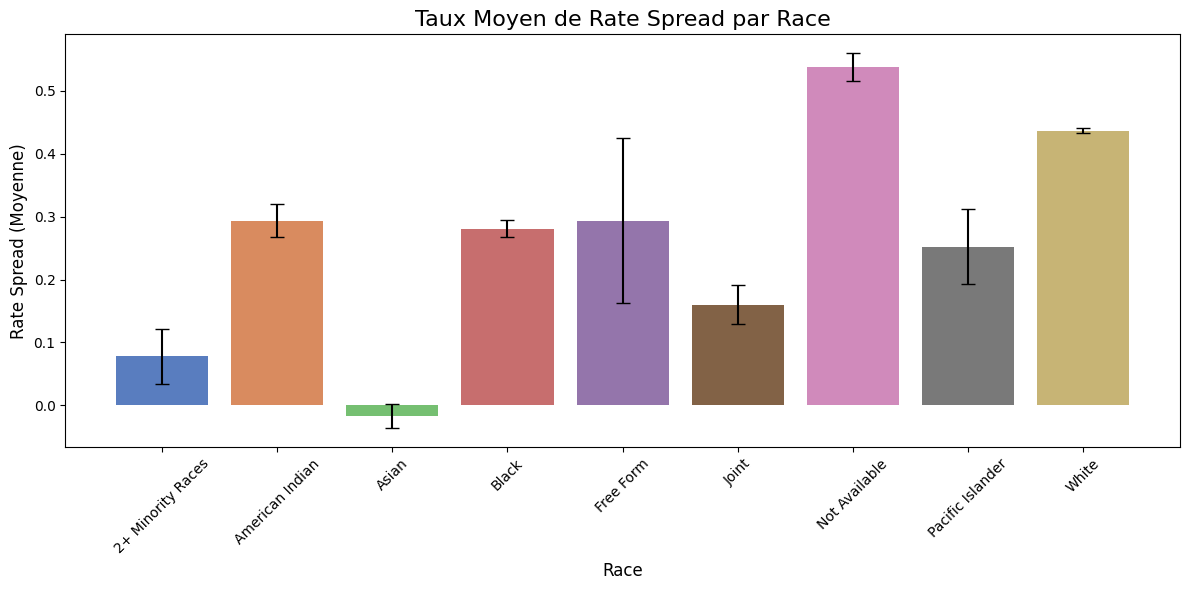

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'rate_spread' to numeric
state_TX['rate_spread'] = pd.to_numeric(state_TX['rate_spread'], errors='coerce')

# Check for any NaN values after conversion
print(f'Number of NaN values in rate_spread: {state_TX["rate_spread"].isna().sum()}')

# Drop rows with NaN in 'rate_spread'
state_TX = state_TX.dropna(subset=['rate_spread'])

# Group by 'derived_race_desc' and calculate mean and standard deviation
rate_spread_by_race = state_TX.groupby('derived_race_desc')['rate_spread'].agg(['mean', 'std']).reset_index()

# Calculate standard error
rate_spread_by_race['error'] = rate_spread_by_race['std'] / np.sqrt(state_TX.groupby('derived_race_desc')['rate_spread'].count().values)

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='derived_race_desc', y='mean', data=rate_spread_by_race, palette='muted', ci=None)

# Add error bars
plt.errorbar(x=rate_spread_by_race['derived_race_desc'],
             y=rate_spread_by_race['mean'],
             yerr=rate_spread_by_race['error'],
             fmt='none', c='black', capsize=5)

# Set titles and labels
plt.title('Taux Moyen de Rate Spread par Race', fontsize=16)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Rate Spread (Moyenne)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

